<a href="https://colab.research.google.com/github/abdul3909/Deep-Learning/blob/main/Bank%20customer%20churn/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Customer churn prediction

Customer churn prediction is to measure why customers are leaving a business. In this notebook, we will be looking at customer churn in bank. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [ ]:
import pandas as pd

### Importing the dataset

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Drop the columns which are not required

In [ ]:
df.drop('CustomerId', axis=1, inplace=True)

In [ ]:
df.drop('Surname', axis=1, inplace=True)
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

RowNumber            int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Data visualization

In [ ]:
exited_yes = df[df.Exited == 1].CreditScore
exited_no = df[df.Exited == 0].CreditScore

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


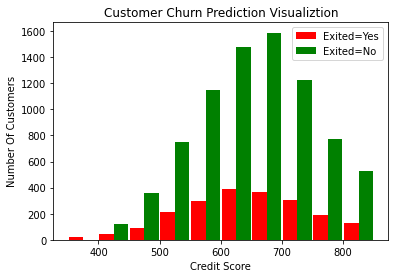

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Credit Score")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([exited_yes, exited_no], rwidth=0.95, color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


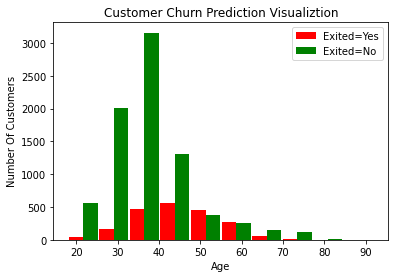

In [ ]:
age_exited_yes = df[df.Exited == 1].Age
age_exited_no = df[df.Exited == 0].Age
import matplotlib.pyplot as plt
plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([age_exited_yes, age_exited_no], rwidth=0.95, color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()

### One-hot-encoding for categorical data

In [ ]:
df1 = pd.get_dummies(data=df, columns=['Geography'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df1.head(10)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,6,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,7,822,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,8,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,9,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,10,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0


### Scaling the data

In [ ]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
df1.drop('RowNumber', axis=1, inplace=True)

In [ ]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


### Splitting the data

In [ ]:
X = df1.drop('Exited', axis=1)
y = df1.Exited

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
X_train.shape

(8000, 12)

In [ ]:
X_test.shape

(2000, 12)

### Build model using ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(12,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7936
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7946
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7955
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.8044
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8077
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8055
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8070
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8074
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8081
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4307 - accura

### Evaluating the model

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8750


[0.32878586649894714, 0.875]

In [ ]:
yp = model.predict(X_test)

In [ ]:
y_pred = []
for y in yp:
  if y > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

### Print classification report and confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1606
           1       0.77      0.52      0.62       394

    accuracy                           0.88      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.87      0.88      0.87      2000



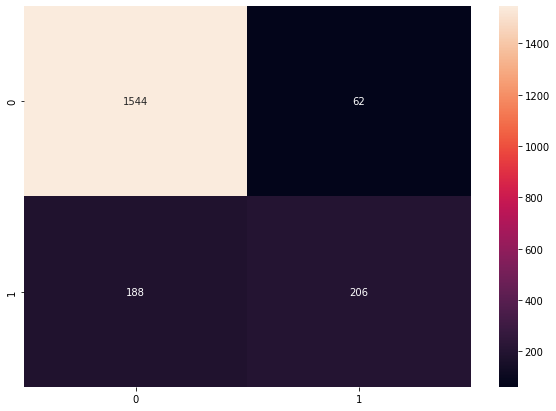

In [ ]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')